<a href="https://colab.research.google.com/github/vn322/RUDN_Lab_Works/blob/main/SQL_lab_3_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 30.03.2024

# **Нормализация**
Нормализация представляет процесс разделения данных по отдельным связанным таблицам. Нормализация устраняет избыточность данных (data redundancy) и тем самым избежать нарушения целостности данных при их изменении, то есть избежать аномалий изменения (update anomaly).



Как правило, нормализация преимущественно применяется при восходящем подходе проектировании базы данных, то есть когда мы все атрибуты, которые надо сохранить в бд, группируем по сущностям, для которых затем создаются таблицы. Однако при нисходящем подходе, когда вначале выявляются сущности, а затем их атрибуты и связи между ними, нормализация также может применяться, например, для проверки корректности спроектированных таблиц.

В ненормализованной форме таблица может хранить информацию о двух и более сущностях. Также она может содержать повторяющиеся столбцы. Также столбцы могут хранить повторяющиеся значения. В нормализованной же форме каждая таблица хранит информацию только об одной сущности.

Нормализация предполагает применение нормальных форм к структуре данных. Существуют 7 нормальных форм. Каждая нормальная форма (за исключением первой) подразумевает, что к данным уже была применена предыдущая нормальная форма. Например, прежде чем применить третью нормальную форму к данным должна быть применена вторая нормальная форма. И строго говоря, база данных считается нормализованной, если к ней применяется третья нормальная форма и выше.

**Первая нормальная форма (1NF**) предполагает, что сохраняемые данные на пересечении строк и столбцов должны представлять скалярное значение, а таблицы не должны содержать повторяющихся строк.

**Вторая нормальная форма (2NF)** предполагает, что каждый столбец, не являющийся ключом, должен зависеть от первичного ключа.

**Третья нормальная форма (3NF)** предполагает, что каждый столбец, не являющийся ключом, должен зависеть только от первичного ключа.

Нормальная форма Бойса-Кодда (BCNF) является немного более строгой версией третьей нормальной формы.

**Четвертая нормальная форма (4NF)** применяется для устранения многозначных зависимостей (multivalued dependencies) - таких зависимостей, где столбец с первичным ключом имеет связь один-ко-многим со столбцом, который не является ключом. Эта нормальная форма устраняет некорректные отношения многие-ко-многим.

**Пятая нормальная форма (5NF)** разделяет таблицы на более малые таблицы для устранения избыточности данных. Разбиение идет до тех пор, пока нельзя будет воссоздать оригинальную таблицу путем объединения малых таблиц.

**Шестая нормальная форма** (domain key normal form / 6NF). Каждое ограничение в связях между таблицами должно зависеть только от ограничений ключа и ограничений домена, где домен представляет набор допустимых значений для столбца. Эта форма предотвращает добавление недопустимых данных путем установки ограничения на уровне отношений между таблицами, но не на уровне таблиц или столбцов. Данная форма, как правило, не применима на уровне СУБД, в том числе и в SQL Server.

## **Функциональная зависимость**
Ключевым понятием нормализации является функциональная зависимость. Функциональная зависимость описывает связь между атрибутами отношения. Например, если атрибут В функционально зависит от атрибута А (А → В), то каждое значение атрибута А связано только с одним значением атрибута В. Причем атрибуты А и В могут состоять из одного или нескольких атрибутов. То есть, если две строки имеют одно и то же значение атрибута А, то они обязательно имеют одно и то же значение атрибута В. При этом для одного значения атрибута В могут существовать несколько различных значений атрибута А. Атрибут А в этой зависимости еще называется детерминантом.



Например, возьмем следующую таблицу, которая представляет университетские курсы:

---Course ------	Teacher	----- Position

Математика - Смит --	Профессор

Алгориты ---	Адамс --	Ассистент

JavaScript --	Адамс ---	Ассистент

Здесь атрибут Teacher функционально зависит от атрибута Course (Course → Teacher).

То есть зная название курса, мы можем определить его преподавателя. И в этом случае можно говорить, что между атрибутами Course и Teacher есть связь 1:1, а между Teacher и Course связь 1:N, так как есть несколько курсов, которые может вести один преподаватель.

При этом атрибут Course функционально не зависит от атрибута Teacher.

Кроме того, здесь можно проследить еще две функциональных зависимости. В частности, атрибут Position зависит от атрибута Teacher (Teacher → Position). Зная имя преподавателя, мы можем определить его должность.

И также атрибут Position функционально зависит от атрибута Course - зная название курса, мы можем сказать должность преподавателя.



В таблице в нормализованной базе данных единственным детерминантом должен быть атрибут, который является первичным ключом. А все остальные атрибуты должны функционально зависеть от первичного ключа.

Например, в данном случае мы можем взять в качестве первичного ключа название курса с учетом, что курсы могут иметь только уникальные названия. Однако должность преподавателя в данном случае будет зависеть сразу от двух атрибутов - от Course и Teacher. И подобные зависимости могут свидетельствовать о том, что база данных и конкретно таблица курсов имеет недостатки в проектировании и может быть источником аномалий обновления.

## **Первая нормальная форма**
Первая нормальная форма предполагает, что таблица не должна содержать повторяющихся столбцов или таких столбцов, которые содержат наборы значений. Ненормализованная таблица в этом случае может содержать одну или несколько повторяющихся групп данных. Повторяющаяся группа - это группа из одного или нескольких атрибутов таблицы, в которой возможно наличие нескольких значений для ключевого атрибута таблицы.

Итогом применения первой формы должно стать наличие для одного атрибута сущности только одного столбца в таблице, который при этом должен содержать скалярное значение.

Есть два похода к переходу к ненормализованной таблицы к первой нормальной форме. Первый способ называется выравниванием или flattaning. Он предполагает декомпозицию строки с повторяющимися группами данных, при котором для каждой повторяющейся группы создается своя строка. Полученная в результате таблица будет содержать атомарные значения для каждого из атрибутов. Хотя в то же время этот подход увеличит избыточность данных.

Второй подход предполагает, что один атрибут или группа атрибутов назначаются ключом ненормализованной таблицы, а затем повторяющиеся группы удаляются из таблицы и помещаются в отдельную таблицу вместе с копиями ключа из исходной таблицы.


Рассмотрим применение нормализации на примере. Пусть у нас есть система, которая описывается следующей информацией:

Том посещает курс по математике, который преподает Смит. Дата записи 11/06/2017.

Сэм посещает курс по алгоритмам, которые преподает Адамс. Дата записи 12/06/2017.

Боб посещает курс по математике, который преподает Смит. Дата записи 13/06/2017.

Том посещает курс по языку JavaScript, который преподает Адамс. Дата записи 14/06/2017.

Сэм имеет два электронных адреса: sam@gmail.com и sam@hotmail.com.

В университете может быть только один курс с определенным именем. Один преподаватель может преподавать несколько курсов.

Вначале определим ненормализованную таблицу StudentCourses, которая содержит всю эту информацию:
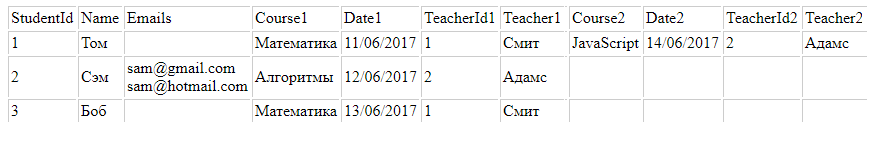

Для каждого студента определены:

 уникальный идентификатор StudentId,

а также атрибут Name (имя),

Emails (все электронные адреса),

Course1 /Course2(курс),

Date1/Date2 (дата поступления),

Teacher1/Teacher2 (преподаватель).

Также чтобы различать преподавателей (так как теоретически могут быть преподаватели с одной и той же фамилией), добавлен атрибут TeacherId1/TeacherId2.

Для курсов такой идентификатор не требуется, так как в нашем случае название курса уникально.

Поскольку Том записан сразу на два курса, то несколько атрибутов пришлось дублировать. Но что будет, когда Том в стремлении получить никому не нужные сертификаты запишется еще на десяток курсов?

Эта таблица представляет прекрасный пример отклонения от первой нормальной формы. В первую очередь мы видим группу повторяющихся атрибутов, которые представляют данные по одному курсу: Course, Date, TeacherId, Teacher. Эти атрибуты представляют повторяющуюся группу, которую можно условно назвать StudentCourse.

StudentCourse = (Course, Date, TeacherId, Teacher)

Вторая проблема - атрибут Emails содержит набор электронных адресов. Фактически этот атрибут также образует повторяющуюся группу.

Для избавления от первой повторяющейся группы атрибутов применим первый подход: создадим для каждой повторяющейся группы отдельную строку.

StudentId -	Name --	Emails--	CourseId --	Course --	Date --	TeacherId	-- Teacher

1- Том	- ? -	1 -	Математика -	11/06/2017 -	1	 -Смит

1 -	Том	- ? -	2 -	JavaScript - 	14/06/2017 -	2	 - Адамс

2	- Сэм	- sam@gmail.com
sam@hotmail.com -	3	 - Алгоритмы	 - 12/06/2017 - 	2	 - Адамс

3 -	Боб - ? -		1	 - Математика	- 13/06/2017	 - 1 -	Смит


В данном случае увеличилась избыточность данных, но тем не менее мы избавились от повторяющейся группы.

Также следует отметить, что теперь атрибут StudentId не может использоваться в качестве первичного ключа.

И в данном случае просматривается только один потенциальный ключ, который и будет использоваться в качестве первичного - это сразу два столбца StudentId и Course.

Но название курса - не лучший ключ, если учитывать, что это название может редактироваться и изменяться. Поэтому для каждого курса добавлен еще один атрибут - CourseId - уникальной номер курса, который вместе с StudentId составляет первичный ключ.

Хотя в принципе может было бы и оставить в качестве части первичного ключа имя курса с учетом, что оно уникально.

Для избавления от второй повторяющейся группы - атрибута Emails применим второй подход: вынесение этой группы с копией ключа в отдельную таблицу.

Для этого определим таблицу Email


Email -	StudentId

sam@gmail.com	- 2

sam@hotmail.com	 - 2

Так как электронный адрес в принципе уникален, то его можно сделать первичным ключом.

Таким образом, таблицы Emails с таблицей StudentCourses будет связана связью один ко многим (один студент - много электронных адресов). И в этом случае таблица StudentCourses сократится следующим образом:


StudentId -	Name - CourseId -	Course	- Date	- TeacherId -	Teacher

1 -	Том -	1	- Математика -	11/06/2017 -	1	 -Смит

1 -	Том -	2 -	JavaScript	- 14/06/2017	- 2 -	Адамс

2 -	Сэм -	3	- Алгоритмы -	12/06/2017 -	2	- Адамс

3 -	Боб	- 1 -	Математика -	13/06/2017	- 1	- Смит


Теперь у нас нет повторяющихся столбцов, но увеличилась избыточность данных, так как для студента Том определено уже две строки в таблице, и соответственно Id повторяется. Но тем не менее 1-я нормальная форма применена.

В принципе можно отметить, что если повторяющиеся группы содержат уникальные значения для каждой строки таблицы (как в случае с электронными адресами), то мы имеем дело с потенциальной связью один ко многим.

Если же повторяющиеся группы содержат неуникальные значения, которые могут иметь разные строки таблицы (как в случае с атрибутами курсов), то это скрывается потенциальная связь многие ко многим.

## **Вторая нормальная форма**

Во второй нормальной форме каждый столбец в таблице, который не является ключом, должен зависеть от ключа.

Ключевой момент второй нормальной формы - полная функциональная зависимость. Она предполагает, что атрибут В полностью функционально зависим от атрибута А, если атрибут В функционально зависит от полного значения атрибута А, а не от какого-либо подмножества значений из атрибута А. То есть, если атрибут А составляют несколько значений, скажем, А1 и А2, то атрибут В полностью функционально зависит от А, если он зависит и от А1 и от А2 (А1, А2 → В).

Если атрибут В зависит только от какого-либо подмножества из атрибута А, например, только от А1, то имеет место частичная функциональная зависимость.

Эта форма применяется к тем таблицам, которые имеют составной первичный ключ, то есть где первичный ключ состоит из нескольких атрибутов. Если в таблице несоставной первичный ключ, то в этом случае считается, что все остальные атрибуты автоматически находятся в полной функциональной зависимости от первичного ключа.




Вторая нормальная форма применяется только к тем таблицам, которые находятся в первой нормальной форме. После применения второй формы все столбцы таблицы зависят от первичного ключа.

Возьмем сформированную в прошлой теме таблицу StudentCourses после применения первой нормальной формы:

StudentId -	Name -	CourseId -	Course -	Date	- TeacherId -	Teacher

1	- Том -	1 -	Математика -	11/06/2017	- 1 -	Смит

1	- 	Том		- 2		- JavaScript	- 	14/06/2017	- 	2	- 	Адамс

2	- 	Сэм	- 	3	- 	Алгоритмы		- 12/06/2017		- 2		- Адамс

3	- Боб	- 	1		- Математика	- 	13/06/2017	- 	1	- 	Смит

На данный момент эта таблица имеет составной первичный ключ StudentId+CourseId. Какие функциональные зависимости от ключевых атрибутов здесь можно выделить:

StudentId, CourseId → Date

StudentId → Name

CourseId → Course, TeacherId, Teacher

От обоих частей составного ключа StudentId+CourseId зависит только арибут Date - дата, в которую студент с идентификатором StudentId поступил на курс с идентифкатором CourseId.


Атрибут Name зависит только от части составного ключа - от атрибута StudentId, так как зная идентификатор студента, можно сказать, какое у него имя. В данном случае имеет факт частичной зависимости.


Атрибуты Course, TeacherId, Teacher, Position зависит от другой части ключа - от атрибута CourseId. Зная значение CourseId, можно сказать, как называется курс, какой у курса преподаватель, какую должность он занимает. Опять же здесь частичная зависимость.

Наличие частичных зависимостей говорит о том, что таблица не находится во второй нормальной форме. И для перехода к этой форме необходимо переместить атрибуты, которые не входят в первичный ключ, в новую таблицу вместе с копией части первичного ключа, от которой они функционально зависят.

В нашем случае из одной таблицы получатся три.

Таблица Students:

StudentId -	Name

1		- Том

2		- Сэм

3	- 	Боб




Таблица Courses:

CourseId	- Course		- TeacherId	- Teacher

1	- 	Математика	- 	1	- 	Смит

2		- JavaScript	- 	2		- Адамс

3	- 	Алгоритмы	- 	2	- 	Адамс



И таблица StudentCourses:

StudentId	- CourseId		- Date

1		- 1		- 11/06/2017

1	- 	2		- 14/06/2017


2		- 3	- 	12/06/2017

3	- 	1	- 	13/06/2017



Итогом стало образование связи многие ко многим (много студентов - много курсов) между таблицами Students и Courses через таблицу StudentCourses .

Таким образом, база данных перешла во вторую нормальную форму.

## **Третья нормальная форма**

Третья нормальная форма предполагает, что каждый столбец, не являющийся ключом, должен зависеть только от столбца, который является ключом, то есть должна отсутствовать транзитивная функциональная зависимость (transitive functional dependency)

Транзитивная функциональная зависимость выражается следующим образом: А → В и В → С. То есть атрибут С транзитивно зависит от атрибута А, если атрибут С зависит от атрибута В, а атрибут В зависит от атрибута А (при условии, что атрибут А функционально не зависит ни от атрибута В, ни от атрибута С).

Если столбец зависит не только от первичного ключа, то данный столбец находится не в той таблице, в которой он должен находиться, либо же является производным от других столбцов.



Для нормализации из исходной таблицы те атрибуты, которые находятся в транзитивной зависимости от ключа, выносятся в отдельную таблицу с копией того атрибута, от которого они непосредственно зависят.

При применении третьей нормальной формы таблица должна находиться во второй нормальной форме. 3NF позволяет значительно снизить избыточность данных.

Для примера возьмем сформированную в прошлой теме таблицу Courses, которая содержит информацию о курсах и которая находится во второй нормальной форме:


CourseId	- Course 	- 	TeacherId		- Teacher

1	- 	Математика	- 	1	- 	Смит

2		- JavaScript		- 2		- Адамс

3		- Алгоритмы		- 2		- Адамс


Какие функциональные зависимости здесь можно выделить:

CourseId → Course, TeacherId, Teacher

Course → CourseId, TeacherId, Teacher

TeacherId → Teacher



Третья зависимость говорит о том, что, зная идентификатор преподавателя, мы можем узнать его фамилию и должность. То есть через атрибут TeacherId атрибут Teacher зависит от CourseId (CourseId→ TeacherId и TeacherId → Teacher). И в данном случае мы можем говорить о транзитивной зависимости Teacher, Position от CourseId.



Для нормализации необходимо вынести в отдельную таблицу атрибуты TeacherId и Teacher. Для этого пусть будет отдельная таблица Teachers:

TeacherId 	- 	Teacher

1	- 	Смит

2	- 	Адамс

А таблица Courses сократится следующим образом:

CourseId -	Course	- TeacherId

1	- 	Математика	- 	1

2	- 	JavaScript	- 	2

3		- Алгоритмы		- 2



# **Итог:** **Нормализация баз данных**
**Плюсы нормализации баз данных**

 Нормализацию нельзя назвать обязательным мероприятием, но у нее есть целый ряд положительных черт.

1.    **Нормализация упрощает процессы выборки.**

В данном случае речь идет об упрощении составления запросов. Пользователь легко может получить информацию по простейшему запросу. Обеспечение целостности данных. В процессе нормализации сокращается вероятность искажения и потери важной информации.

2.    **Улучшенная масштабируемость.**

При соблюдении всех правил нормализации постепенно создаются благоприятные условия для расширения такой базы.

3.  **Отсутствие избыточности.**

Большой объем информации задействует огромную часть свободного места на жестком диске и усложняет процесс обслуживания информации.

В некоторых случаях возникают множественные повторяющиеся записи и одинаковая информация сразу в нескольких местах. Из-за этого пользователи вынуждены вносить изменения сразу во все источники информации.

Это очень трудоемкое занятие нередко приводит к ошибкам. Намного проще сделать таким образом, чтобы данные по одному подразделению или участку хранились в соответствующей таблице и больше нигде.

Избыточность предполагает постоянное дублирование данных, усложняет работу с базой данных и раздувает ее размер.

4. **Отсутствие несогласованных зависимостей.**

Всевозможные нестыковки и несогласованные зависимости также усложняют доступ к информации, поскольку путь к данным может быть нелогичным и неверным.


# **Задание**
Нормализуйте БД вплоть до третьей нормальной формы

In [ ]:
import sqlite3


try:
    sqlite_connection = sqlite3.connect('uni.db')
    cursor = sqlite_connection.cursor()
    print("База данных создана и успешно подключена к SQLite")

    sqlite_select_query = "select sqlite_version();" #создается запрос для получения версии базы данны
    cursor.execute(sqlite_select_query)
    record = cursor.fetchall()
    print("Версия базы данных SQLite: ", record)
    cursor.close()

except sqlite3.Error as error:
    print("Ошибка при подключении к sqlite", error)
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")


База данных создана и успешно подключена к SQLite
Версия базы данных SQLite:  [('3.37.2',)]
Соединение с SQLite закрыто


# Tab-Student

In [ ]:
import sqlite3

try:
    sqlite_connection = sqlite3.connect('uni.db')
    sqlite_create_table_query = '''CREATE TABLE student (
                                StudentID TEXT  PRIMARY KEY,
                                Name TEXT
                                );'''

    cursor = sqlite_connection.cursor()
    print("База данных подключена к SQLite")
    cursor.execute(sqlite_create_table_query)
    sqlite_connection.commit()
    print("Таблица SQLite создана")

    cursor.close()

except sqlite3.Error as error:
    print("Ошибка при подключении к sqlite", error)
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

База данных подключена к SQLite
Таблица SQLite создана
Соединение с SQLite закрыто


In [ ]:

import sqlite3
import traceback
import sys

try:
    sqlite_connection = sqlite3.connect('uni.db')
    cursor = sqlite_connection.cursor()
    print("База данных подключена к SQLite")

    sqlite_insert_query = """INSERT INTO student (StudentID, Name)
                            VALUES (1,'Tom'),

                                    (2,'Sam'),

                                    (3, 'Bob')"""

    count = cursor.execute(sqlite_insert_query)
    sqlite_connection.commit()
    print("Запись успешно вставлена ​​в таблицу sqlitedb_developers ", cursor.rowcount)
    cursor.close()

except sqlite3.Error as error:
    print("Не удалось вставить данные в таблицу sqlite")
    print("Класс исключения: ", error.__class__)
    print("Исключение", error.args)
    print("Печать подробноcтей исключения SQLite: ")
    exc_type, exc_value, exc_tb = sys.exc_info()
    print(traceback.format_exception(exc_type, exc_value, exc_tb))
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

База данных подключена к SQLite
Запись успешно вставлена ​​в таблицу sqlitedb_developers  3
Соединение с SQLite закрыто


In [ ]:
import sqlite3

# Устанавливаем соединение с базой данных
connection = sqlite3.connect('uni.db')
cursor = connection.cursor()

# Выбираем всех  игроков
cursor.execute('SELECT * FROM student')
users = cursor.fetchall()

# Выводим результаты
for name in users:
  print(name)

# Закрываем соединение
connection.close()

('1', 'Tom')
('2', 'Sam')
('3', 'Bob')


# Tab-Teacher

In [ ]:
import sqlite3

try:
    sqlite_connection = sqlite3.connect('uni.db')
    sqlite_create_table_query = '''CREATE TABLE teacher (
                                TeacherID TEXT  PRIMARY KEY,
                                Teacher TEXT
                                );'''

    cursor = sqlite_connection.cursor()
    print("База данных подключена к SQLite")
    cursor.execute(sqlite_create_table_query)
    sqlite_connection.commit()
    print("Таблица SQLite создана")

    cursor.close()

except sqlite3.Error as error:
    print("Ошибка при подключении к sqlite", error)
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

База данных подключена к SQLite
Таблица SQLite создана
Соединение с SQLite закрыто


In [ ]:

import sqlite3
import traceback
import sys

try:
    sqlite_connection = sqlite3.connect('uni.db')
    cursor = sqlite_connection.cursor()
    print("База данных подключена к SQLite")

    sqlite_insert_query = """INSERT INTO teacher (TeacherID, Teacher)
                            VALUES (1,'Smit'),

                                    (2,'Adams')"""

    count = cursor.execute(sqlite_insert_query)
    sqlite_connection.commit()
    print("Запись успешно вставлена ​​в таблицу sqlitedb_developers ", cursor.rowcount)
    cursor.close()

except sqlite3.Error as error:
    print("Не удалось вставить данные в таблицу sqlite")
    print("Класс исключения: ", error.__class__)
    print("Исключение", error.args)
    print("Печать подробноcтей исключения SQLite: ")
    exc_type, exc_value, exc_tb = sys.exc_info()
    print(traceback.format_exception(exc_type, exc_value, exc_tb))
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

База данных подключена к SQLite
Запись успешно вставлена ​​в таблицу sqlitedb_developers  2
Соединение с SQLite закрыто


In [ ]:
import sqlite3

# Устанавливаем соединение с базой данных
connection = sqlite3.connect('uni.db')
cursor = connection.cursor()

# Выбираем всех  игроков
cursor.execute('SELECT * FROM teacher')
users = cursor.fetchall()

# Выводим результаты
for name in users:
  print(name)

# Закрываем соединение
connection.close()

('1', 'Smit')
('2', 'Adams')


# Tab-Course

In [ ]:
import sqlite3

try:
    sqlite_connection = sqlite3.connect('uni.db')
    sqlite_create_table_query = '''CREATE TABLE course (
                                CourseID INTEGER  PRIMARY KEY,
                                Course TEXT,
                                TeacherID INTEGER
                                );'''

    cursor = sqlite_connection.cursor()
    print("База данных подключена к SQLite")
    cursor.execute(sqlite_create_table_query)
    sqlite_connection.commit()
    print("Таблица SQLite создана")

    cursor.close()

except sqlite3.Error as error:
    print("Ошибка при подключении к sqlite", error)
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

База данных подключена к SQLite
Таблица SQLite создана
Соединение с SQLite закрыто


In [ ]:

import sqlite3
import traceback
import sys

try:
    sqlite_connection = sqlite3.connect('uni.db')
    cursor = sqlite_connection.cursor()
    print("База данных подключена к SQLite")

    sqlite_insert_query = """INSERT INTO course (CourseID, Course, TeacherID)
                            VALUES (1,'Mathematics',1),
                                    (2,'JawaScript',2),
                                    (3,'Algorithms',2)"""

    count = cursor.execute(sqlite_insert_query)
    sqlite_connection.commit()
    print("Запись успешно вставлена ​​в таблицу sqlitedb_developers ", cursor.rowcount)
    cursor.close()

except sqlite3.Error as error:
    print("Не удалось вставить данные в таблицу sqlite")
    print("Класс исключения: ", error.__class__)
    print("Исключение", error.args)
    print("Печать подробноcтей исключения SQLite: ")
    exc_type, exc_value, exc_tb = sys.exc_info()
    print(traceback.format_exception(exc_type, exc_value, exc_tb))
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

База данных подключена к SQLite
Запись успешно вставлена ​​в таблицу sqlitedb_developers  3
Соединение с SQLite закрыто


In [ ]:
import sqlite3

# Устанавливаем соединение с базой данных
connection = sqlite3.connect('uni.db')
cursor = connection.cursor()

# Выбираем всех  игроков
cursor.execute('SELECT * FROM course')
users = cursor.fetchall()

# Выводим результаты
for name in users:
  print(name)

# Закрываем соединение
connection.close()

(1, 'Mathematics', 1)
(2, 'JawaScript', 2)
(3, 'Algorithms', 2)


# Tab-Emaile

In [ ]:
import sqlite3

try:
    sqlite_connection = sqlite3.connect('uni.db')
    sqlite_create_table_query = '''CREATE TABLE emaile (
                                Emaile TEXT  PRIMARY KEY,
                                StudentID INTEGER
                                );'''

    cursor = sqlite_connection.cursor()
    print("База данных подключена к SQLite")
    cursor.execute(sqlite_create_table_query)
    sqlite_connection.commit()
    print("Таблица SQLite создана")

    cursor.close()

except sqlite3.Error as error:
    print("Ошибка при подключении к sqlite", error)
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

База данных подключена к SQLite
Таблица SQLite создана
Соединение с SQLite закрыто


In [ ]:

import sqlite3
import traceback
import sys

try:
    sqlite_connection = sqlite3.connect('uni.db')
    cursor = sqlite_connection.cursor()
    print("База данных подключена к SQLite")

    sqlite_insert_query = """INSERT INTO emaile (Emaile, StudentID)
                            VALUES ('sam@gmail.com' ,2),
                                    ('sam@hotmail.com',2)"""

    count = cursor.execute(sqlite_insert_query)
    sqlite_connection.commit()
    print("Запись успешно вставлена ​​в таблицу sqlitedb_developers ", cursor.rowcount)
    cursor.close()

except sqlite3.Error as error:
    print("Не удалось вставить данные в таблицу sqlite")
    print("Класс исключения: ", error.__class__)
    print("Исключение", error.args)
    print("Печать подробноcтей исключения SQLite: ")
    exc_type, exc_value, exc_tb = sys.exc_info()
    print(traceback.format_exception(exc_type, exc_value, exc_tb))
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

База данных подключена к SQLite
Запись успешно вставлена ​​в таблицу sqlitedb_developers  2
Соединение с SQLite закрыто


In [ ]:
import sqlite3

# Устанавливаем соединение с базой данных
connection = sqlite3.connect('uni.db')
cursor = connection.cursor()

# Выбираем всех  игроков
cursor.execute('SELECT * FROM emaile')
users = cursor.fetchall()

# Выводим результаты
for name in users:
  print(name)

# Закрываем соединение
connection.close()

('sam@gmail.com', 2)
('sam@hotmail.com', 2)


# Tab-StudentCourses

In [ ]:
import sqlite3

try:
    sqlite_connection = sqlite3.connect('uni.db')
    sqlite_create_table_query = '''CREATE TABLE StudentCourses (
                                Date TEXT PRIMARY KEY,
                                StudentID INTEGER,
                                CourseID INTEGER,
                                TeacherID INTEGER
                                );'''

    cursor = sqlite_connection.cursor()
    print("База данных подключена к SQLite")
    cursor.execute(sqlite_create_table_query)
    sqlite_connection.commit()
    print("Таблица SQLite создана")

    cursor.close()

except sqlite3.Error as error:
    print("Ошибка при подключении к sqlite", error)
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

База данных подключена к SQLite
Таблица SQLite создана
Соединение с SQLite закрыто


In [ ]:

import sqlite3
import traceback
import sys

try:
    sqlite_connection = sqlite3.connect('uni.db')
    cursor = sqlite_connection.cursor()
    print("База данных подключена к SQLite")

    sqlite_insert_query = """INSERT INTO StudentCourses (Date, StudentID, CourseID,TeacherID)
                            VALUES ('11/06/2017', 1,1,1),
                                    ('14/06/2017', 1,2,2),
                                    ('12/06/2017', 2,3,2),
                                    ('13/06/2017', 3,1,1)"""

    count = cursor.execute(sqlite_insert_query)
    sqlite_connection.commit()
    print("Запись успешно вставлена ​​в таблицу sqlitedb_developers ", cursor.rowcount)
    cursor.close()

except sqlite3.Error as error:
    print("Не удалось вставить данные в таблицу sqlite")
    print("Класс исключения: ", error.__class__)
    print("Исключение", error.args)
    print("Печать подробноcтей исключения SQLite: ")
    exc_type, exc_value, exc_tb = sys.exc_info()
    print(traceback.format_exception(exc_type, exc_value, exc_tb))
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

База данных подключена к SQLite
Запись успешно вставлена ​​в таблицу sqlitedb_developers  4
Соединение с SQLite закрыто


In [ ]:
import sqlite3

# Устанавливаем соединение с базой данных
connection = sqlite3.connect('uni.db')
cursor = connection.cursor()

# Выбираем всех  игроков
cursor.execute('SELECT * FROM StudentCourses')
users = cursor.fetchall()

# Выводим результаты
for name in users:
  print(name)

# Закрываем соединение
connection.close()

('11/06/2017', 1, 1, 1)
('14/06/2017', 1, 2, 2)
('12/06/2017', 2, 3, 2)
('13/06/2017', 3, 1, 1)


Вначале определим ненормализованную таблицу StudentCourses, которая содержит всю эту информацию:
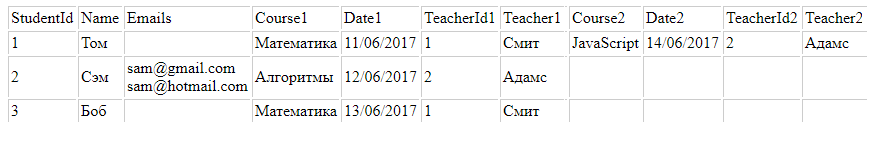

# Задание 1

Таблица до нормализации:

Student#	- Advisor -Adv-Room -	Class1	- Class2 -	Class3


1022	- 	Петров		- 412		- 101-07	- 	143-01	- 	159-02

4123		- Иванов	- 	216		- 101-07	- 	143-01	- 	179-04




In [52]:
import sqlite3


try:
    sqlite_connection = sqlite3.connect('StudentClass.db')
    cursor = sqlite_connection.cursor()
    print("База данных создана и успешно подключена к SQLite")

    sqlite_select_query = "select sqlite_version();" #создается запрос для получения версии базы данны
    cursor.execute(sqlite_select_query)
    record = cursor.fetchall()
    print("Версия базы данных SQLite: ", record)
    cursor.close()

except sqlite3.Error as error:
    print("Ошибка при подключении к sqlite", error)
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")


База данных создана и успешно подключена к SQLite
Версия базы данных SQLite:  [('3.37.2',)]
Соединение с SQLite закрыто


# Tab-Advisor

In [53]:
import sqlite3

try:
    sqlite_connection = sqlite3.connect('StudentClass.db')
    sqlite_create_table_query = '''CREATE TABLE Advisor (
                                AdvisorID INTEGER  PRIMARY KEY,
                                Advisor TEXT,
                                Adv_Room INTEGER
                                );'''

    cursor = sqlite_connection.cursor()
    print("База данных подключена к SQLite")
    cursor.execute(sqlite_create_table_query)
    sqlite_connection.commit()
    print("Таблица SQLite создана")

    cursor.close()

except sqlite3.Error as error:
    print("Ошибка при подключении к sqlite", error)
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

База данных подключена к SQLite
Таблица SQLite создана
Соединение с SQLite закрыто


In [54]:

import sqlite3
import traceback
import sys

try:
    sqlite_connection = sqlite3.connect('StudentClass.db')
    cursor = sqlite_connection.cursor()
    print("База данных подключена к SQLite")

    sqlite_insert_query = """INSERT INTO Advisor (AdvisorID, Advisor, Adv_Room)
                            VALUES (1,'Петров', 412),
                                   (2, 'Иванов', 216)"""

    count = cursor.execute(sqlite_insert_query)
    sqlite_connection.commit()
    print("Запись успешно вставлена ​​в таблицу sqlitedb_developers ", cursor.rowcount)
    cursor.close()

except sqlite3.Error as error:
    print("Не удалось вставить данные в таблицу sqlite")
    print("Класс исключения: ", error.__class__)
    print("Исключение", error.args)
    print("Печать подробноcтей исключения SQLite: ")
    exc_type, exc_value, exc_tb = sys.exc_info()
    print(traceback.format_exception(exc_type, exc_value, exc_tb))
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

База данных подключена к SQLite
Запись успешно вставлена ​​в таблицу sqlitedb_developers  2
Соединение с SQLite закрыто


In [55]:
import sqlite3

# Устанавливаем соединение с базой данных
connection = sqlite3.connect('StudentClass.db')
cursor = connection.cursor()

# Выбираем всех
cursor.execute('SELECT * FROM Advisor')
users = cursor.fetchall()

# Выводим результаты
for name in users:
  print(name)

# Закрываем соединение
connection.close()

(1, 'Петров', 412)
(2, 'Иванов', 216)


# Tab-Class

In [56]:
import sqlite3

try:
    sqlite_connection = sqlite3.connect('StudentClass.db')
    sqlite_create_table_query = '''CREATE TABLE Class (
                                ClassID INTEGER  PRIMARY KEY,
                                Class TEXT
                                );'''

    cursor = sqlite_connection.cursor()
    print("База данных подключена к SQLite")
    cursor.execute(sqlite_create_table_query)
    sqlite_connection.commit()
    print("Таблица SQLite создана")

    cursor.close()

except sqlite3.Error as error:
    print("Ошибка при подключении к sqlite", error)
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

База данных подключена к SQLite
Таблица SQLite создана
Соединение с SQLite закрыто


In [57]:

import sqlite3
import traceback
import sys

try:
    sqlite_connection = sqlite3.connect('StudentClass.db')
    cursor = sqlite_connection.cursor()
    print("База данных подключена к SQLite")

    sqlite_insert_query = """INSERT INTO Class (ClassID, Class)
                            VALUES (1,'101-07'),
                                   (2,'143-01'),
                                   (3,'159-02'),
                                   (4, '179-04')"""

    count = cursor.execute(sqlite_insert_query)
    sqlite_connection.commit()
    print("Запись успешно вставлена ​​в таблицу sqlitedb_developers ", cursor.rowcount)
    cursor.close()

except sqlite3.Error as error:
    print("Не удалось вставить данные в таблицу sqlite")
    print("Класс исключения: ", error.__class__)
    print("Исключение", error.args)
    print("Печать подробноcтей исключения SQLite: ")
    exc_type, exc_value, exc_tb = sys.exc_info()
    print(traceback.format_exception(exc_type, exc_value, exc_tb))
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

База данных подключена к SQLite
Запись успешно вставлена ​​в таблицу sqlitedb_developers  4
Соединение с SQLite закрыто


In [58]:
import sqlite3

# Устанавливаем соединение с базой данных
connection = sqlite3.connect('StudentClass.db')
cursor = connection.cursor()

# Выбираем всех
cursor.execute('SELECT * FROM Class')
users = cursor.fetchall()

# Выводим результаты
for name in users:
  print(name)

# Закрываем соединение
connection.close()

(1, '101-07')
(2, '143-01')
(3, '159-02')
(4, '179-04')


# Tab-Students

In [59]:
import sqlite3

try:
    sqlite_connection = sqlite3.connect('StudentClass.db')
    sqlite_create_table_query = '''CREATE TABLE Student (
                                Student INTEGER  PRIMARY KEY,
                                AdvisorID INTEGER,
                                Class1 INTEGER,
                                Class2 INTEGER,
                                Class3 INTEGER
                                );'''

    cursor = sqlite_connection.cursor()
    print("База данных подключена к SQLite")
    cursor.execute(sqlite_create_table_query)
    sqlite_connection.commit()
    print("Таблица SQLite создана")

    cursor.close()

except sqlite3.Error as error:
    print("Ошибка при подключении к sqlite", error)
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

База данных подключена к SQLite
Таблица SQLite создана
Соединение с SQLite закрыто


In [60]:

import sqlite3
import traceback
import sys

try:
    sqlite_connection = sqlite3.connect('StudentClass.db')
    cursor = sqlite_connection.cursor()
    print("База данных подключена к SQLite")

    sqlite_insert_query = """INSERT INTO Student (Student, AdvisorID, Class1, Class2, Class3)
                            VALUES (1022, 1, 1, 2, 3),
                                   (4123, 2, 1, 2, 4)"""

    count = cursor.execute(sqlite_insert_query)
    sqlite_connection.commit()
    print("Запись успешно вставлена ​​в таблицу sqlitedb_developers ", cursor.rowcount)
    cursor.close()

except sqlite3.Error as error:
    print("Не удалось вставить данные в таблицу sqlite")
    print("Класс исключения: ", error.__class__)
    print("Исключение", error.args)
    print("Печать подробноcтей исключения SQLite: ")
    exc_type, exc_value, exc_tb = sys.exc_info()
    print(traceback.format_exception(exc_type, exc_value, exc_tb))
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

База данных подключена к SQLite
Запись успешно вставлена ​​в таблицу sqlitedb_developers  2
Соединение с SQLite закрыто


In [61]:
import sqlite3

# Устанавливаем соединение с базой данных
connection = sqlite3.connect('StudentClass.db')
cursor = connection.cursor()

# Выбираем всех
cursor.execute('SELECT * FROM Student')
users = cursor.fetchall()

# Выводим результаты
for name in users:
  print(name)

# Закрываем соединение
connection.close()

(1022, 1, 1, 2, 3)
(4123, 2, 1, 2, 4)


# Задание 2
Клиент- 	Код - товара -	Наименование товара	 - Количество -	Цена	- Всего

1	- 121,333,444 -	Лампа, Ножницы, Зонт -	5,2,8	- 2,4,10	- 10,8,80


# Tab-Goods

In [65]:
import sqlite3

try:
    sqlite_connection = sqlite3.connect('Store.db')
    sqlite_create_table_query = '''CREATE TABLE Goods (
                                GoodsID INTEGER  PRIMARY KEY,
                                Name TEXT,
                                Cost INTEGER
                                );'''

    cursor = sqlite_connection.cursor()
    print("База данных подключена к SQLite")
    cursor.execute(sqlite_create_table_query)
    sqlite_connection.commit()
    print("Таблица SQLite создана")

    cursor.close()

except sqlite3.Error as error:
    print("Ошибка при подключении к sqlite", error)
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

База данных подключена к SQLite
Таблица SQLite создана
Соединение с SQLite закрыто


In [66]:

import sqlite3
import traceback
import sys

try:
    sqlite_connection = sqlite3.connect('Store.db')
    cursor = sqlite_connection.cursor()
    print("База данных подключена к SQLite")

    sqlite_insert_query = """INSERT INTO Goods (GoodsID, Name, Cost)
                            VALUES (121, 'Лампа', 2),
                                   (333, 'Ножницы', 4),
                                   (444, 'Зонт', 10)"""

    count = cursor.execute(sqlite_insert_query)
    sqlite_connection.commit()
    print("Запись успешно вставлена ​​в таблицу sqlitedb_developers ", cursor.rowcount)
    cursor.close()

except sqlite3.Error as error:
    print("Не удалось вставить данные в таблицу sqlite")
    print("Класс исключения: ", error.__class__)
    print("Исключение", error.args)
    print("Печать подробноcтей исключения SQLite: ")
    exc_type, exc_value, exc_tb = sys.exc_info()
    print(traceback.format_exception(exc_type, exc_value, exc_tb))
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

База данных подключена к SQLite
Запись успешно вставлена ​​в таблицу sqlitedb_developers  3
Соединение с SQLite закрыто


In [67]:
import sqlite3

# Устанавливаем соединение с базой данных
connection = sqlite3.connect('Store.db')
cursor = connection.cursor()

# Выбираем всех
cursor.execute('SELECT * FROM Goods')
users = cursor.fetchall()

# Выводим результаты
for name in users:
  print(name)

# Закрываем соединение
connection.close()

(121, 'Лампа', 2)
(333, 'Ножницы', 4)
(444, 'Зонт', 10)


# Tab-Store

In [62]:
import sqlite3

try:
    sqlite_connection = sqlite3.connect('Store.db')
    sqlite_create_table_query = '''CREATE TABLE Store (
                                GoodsID INTEGER  PRIMARY KEY,
                                CustomerID INTEGER,
                                Amount INTEGER,
                                Res INTEGER
                                );'''

    cursor = sqlite_connection.cursor()
    print("База данных подключена к SQLite")
    cursor.execute(sqlite_create_table_query)
    sqlite_connection.commit()
    print("Таблица SQLite создана")

    cursor.close()

except sqlite3.Error as error:
    print("Ошибка при подключении к sqlite", error)
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

База данных подключена к SQLite
Таблица SQLite создана
Соединение с SQLite закрыто


In [63]:

import sqlite3
import traceback
import sys

try:
    sqlite_connection = sqlite3.connect('Store.db')
    cursor = sqlite_connection.cursor()
    print("База данных подключена к SQLite")

    sqlite_insert_query = """INSERT INTO Store (GoodsID, CustomerID, Amount, Res)
                            VALUES (121, 1, 5, 10),
                                   (333, 1, 2, 8),
                                   (444, 1, 8, 80)"""

    count = cursor.execute(sqlite_insert_query)
    sqlite_connection.commit()
    print("Запись успешно вставлена ​​в таблицу sqlitedb_developers ", cursor.rowcount)
    cursor.close()

except sqlite3.Error as error:
    print("Не удалось вставить данные в таблицу sqlite")
    print("Класс исключения: ", error.__class__)
    print("Исключение", error.args)
    print("Печать подробноcтей исключения SQLite: ")
    exc_type, exc_value, exc_tb = sys.exc_info()
    print(traceback.format_exception(exc_type, exc_value, exc_tb))
finally:
    if (sqlite_connection):
        sqlite_connection.close()
        print("Соединение с SQLite закрыто")

База данных подключена к SQLite
Запись успешно вставлена ​​в таблицу sqlitedb_developers  3
Соединение с SQLite закрыто


In [64]:
import sqlite3

# Устанавливаем соединение с базой данных
connection = sqlite3.connect('Store.db')
cursor = connection.cursor()

# Выбираем всех
cursor.execute('SELECT * FROM Store')
users = cursor.fetchall()

# Выводим результаты
for name in users:
  print(name)

# Закрываем соединение
connection.close()

(121, 1, 5, 10)
(333, 1, 2, 8)
(444, 1, 8, 80)


# Задание 3
1.   Напишите запрос к SQLite для создания и заполнения нужных таблиц БД для перовго и второго задания
2.  Для второй БД напишите запрос выводящий список первых трех товаров (их всего три, конечо, но не суть) проданных на наибольшую сумму (по возрастанию)



Первая часть задания выполнена выше

In [82]:
import sqlite3

# Устанавливаем соединение с базой данных
connection = sqlite3.connect('Store.db')
cursor = connection.cursor()

# Выбираем
cursor.execute('SELECT DISTINCT Goods.Name, Store.Res FROM Store LEFT JOIN Goods ON Store.GoodsID=Goods.GoodsID ORDER BY Store.Res')
users = cursor.fetchall()

# Выводим результаты
for name in users:
  print(name)

# Закрываем соединение
connection.close()

('Ножницы', 8)
('Лампа', 10)
('Зонт', 80)
